### Outliers

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

(1010,) (1010, 2)


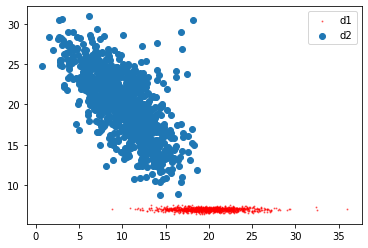

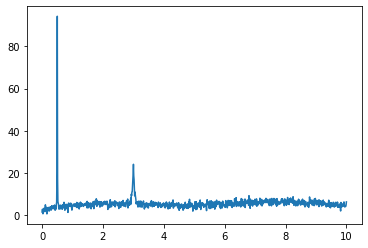

In [2]:
d1 = np.loadtxt('./Outliers/outlier_1d.txt')
d2 = np.loadtxt('./Outliers/outlier_2d.txt')
d3 = np.loadtxt('./Outliers/outlier_curve.txt')

print(d1.shape, d2.shape)

# Let's plot its distribution 
plt.scatter(d1, np.random.normal(7,0.2, size = d1.size),s = 1, alpha = 0.5, color = 'r',label='d1')
# args for normal:  mean, std dev, size
plt.scatter(d2[:,0], d2[:,1],label='d2')
plt.legend()
plt.show()

plt.plot(d3[:,0],d3[:, 1])

Rejection 5 points
Z-score of 3 corresponds to a prob of 0.27%


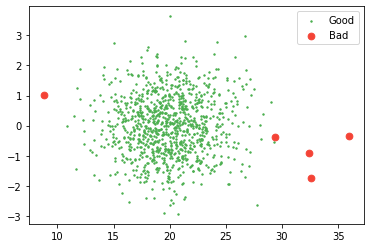

In [3]:
from scipy.stats import norm
mean, std = np.mean(d1), np.std(d1)
z_score = np.abs(d1-mean)/std
threshold = 3
good = z_score < threshold

print(f'Rejection {(~good).sum()} points')

print(
    f'Z-score of 3 corresponds to a prob of {100*2*norm.sf(threshold):0.2f}%')

visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(d1[~good], visual_scatter[~good],
            s=45, label="Bad", color="#F44336")
plt.legend()


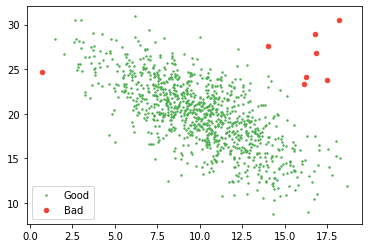

In [4]:
from scipy.stats import multivariate_normal as mn

mean, cov = np.mean(d2, axis=0), np.cov(d2.T) # axis = 0: columns
good = mn(mean, cov).pdf(d2) > 0.01/100

plt.scatter(d2[good,0], d2[good,1], s=2, label="Good",color="#4CAF50")
plt.scatter(d2[~good,0], d2[~good,1], s=20, label="Bad",color="#F44336")
plt.legend()

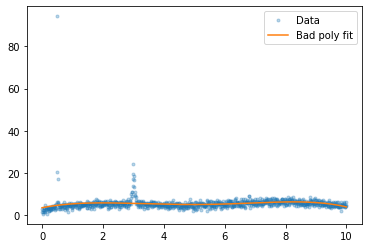

In [14]:
xs, ys = d3.T
p = np.polyfit(xs, ys, deg=5)
#  fits the data within a polynomial function.
ps = np.polyval(p, xs)
# np.polyval([3,0,1], 5)  # 3 * 5**2 + 0 * 5**1 + 1
# >>> 76
plt.plot(xs, ys, ".", label="Data", alpha=0.3)
plt.plot(xs, ps, label="Bad poly fit")
plt.legend()


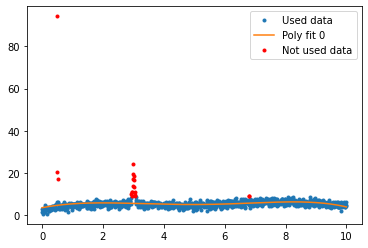

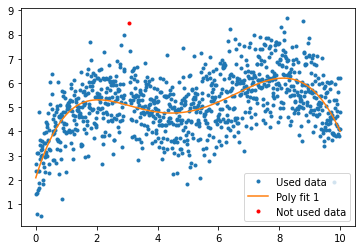

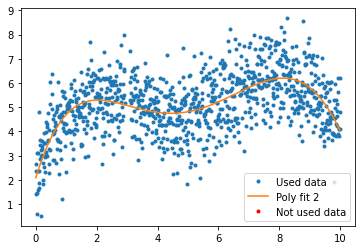

In [18]:
x, y = xs.copy(), ys.copy()

for i in range(5):
    p = np.polyfit(x, y, deg=5)
    ps = np.polyval(p, x)
    good = y-ps < 3

    x_bad, y_bad = x[~good], y[~good]
    x, y = x[good], y[good]

    plt.plot(x, y, '.', label="Used data")
    plt.plot(x, np.polyval(p, x), label=f'Poly fit {i}')
    plt.plot(x_bad, y_bad, ".", label="Not used data", color='red')
    plt.legend()
    plt.show()

    if (~good).sum() == 0:
        break


### <span style="color: #c5f015"> Automating it </span>
Blessed __sklearn__ to the rescue.Check out the main page which lists
a ton of ways you can do outlier detection. I think LOF(Local outlier Finder)
is great - it uses the distance from one point to its closest twenty neighbours 
to figure out point density and removes those in low density regions

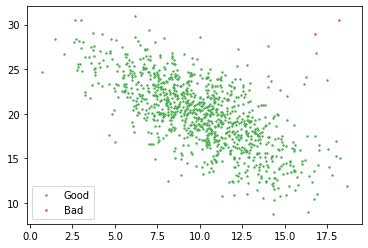

In [30]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
good = lof.fit_predict(d2) == 1
plt.scatter(d2[good, 0], d2[good, 1], s=2, label="Good", color="#4CAF50")
plt.scatter(d2[~good, 0], d2[~good, 1], s=2, label="Bad", color="#F44336")
plt.legend()
